In [146]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
import scipy as sp

# 1.

In [39]:
y1 = np.array([1, 1,3,3,2])
y2 = np.array([1, 3,2,3,4])
z = np.array([1.25, 7, 2.7, 3.2, 5.5])
bias = np.full((5,1), 1)
phi = y1 * y2

X = np.column_stack((bias, phi))
X

array([[1, 1],
       [1, 3],
       [1, 6],
       [1, 9],
       [1, 8]])

In [32]:
scipy_X = sp.Matrix(X)
latex_X = sp.latex(scipy_X)
print(latex_X)

\left[\begin{matrix}1 & 1\\1 & 3\\1 & 6\\1 & 9\\1 & 8\end{matrix}\right]


In [37]:
scipy_X_t = sp.Matrix(X).T
latex_X_t = sp.latex(scipy_X_t)
print(latex_X_t)

\left[\begin{matrix}1 & 1 & 1 & 1 & 1\\1 & 3 & 6 & 9 & 8\end{matrix}\right]


In [33]:
scipy_z = sp.Matrix(z)
latex_z = sp.latex(scipy_z)
print(latex_z)

\left[\begin{matrix}1.25\\7.0\\2.7\\3.2\\5.5\end{matrix}\right]


In [36]:
expr = scipy_X.T * scipy_X
scipy_expr = sp.latex(expr)

\left[\begin{matrix}5 & 27\\27 & 191\end{matrix}\right]


In [24]:
XtXinv = np.linalg.pinv(X.T @ X)
XtXinv

array([[ 0.84513274, -0.11946903],
       [-0.11946903,  0.02212389]])

In [25]:
XtXinv_Xt = XtXinv @ X.T
XtXinv_Xt

array([[ 0.72566372,  0.48672566,  0.12831858, -0.2300885 , -0.11061947],
       [-0.09734513, -0.05309735,  0.01327434,  0.07964602,  0.05752212]])

In [26]:
w = XtXinv_Xt @ z   
w

array([3.3159292 , 0.11371681])

In [38]:
scipy_w = sp.Matrix(w)
latex_w = sp.latex(scipy_w)
print(latex_w)

\left[\begin{matrix}3.31592920353983\\0.113716814159291\end{matrix}\right]


# 2.

In [40]:
llambda = 1
w_ridge = np.linalg.inv(X.T @ X + llambda * np.identity(2)) @ X.T @ z
w_ridge

array([1.81808511, 0.32375887])

In [64]:
scipy_w_ridge = sp.Matrix(w_ridge)
latex_w_ridge = sp.latex(scipy_w_ridge)
print(latex_w_ridge)

\left[\begin{matrix}1.81808510638298\\0.323758865248227\end{matrix}\right]


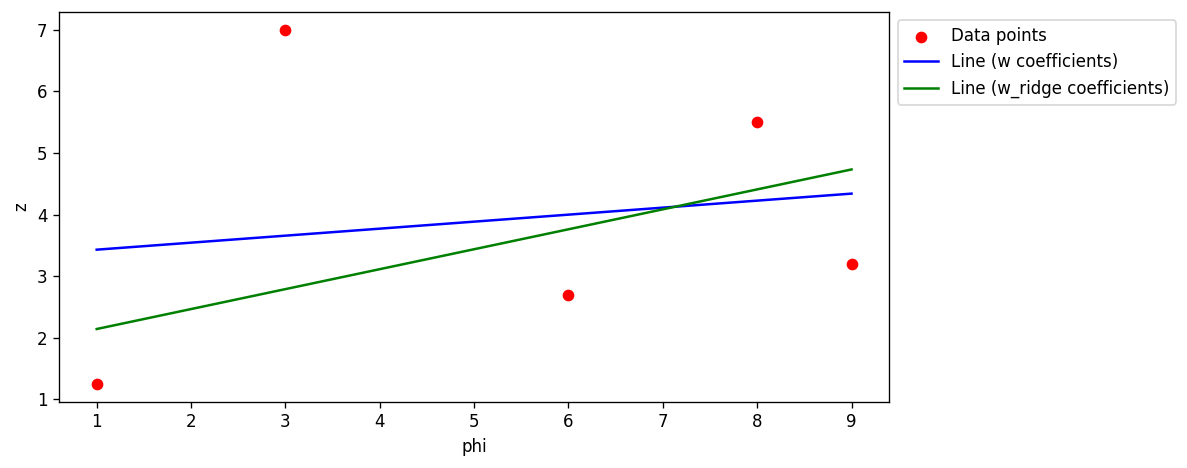

In [63]:
plt.figure(figsize=(10, 4), dpi=120)
plt.scatter(phi, z, color='red', label='Data points')

# Line given by w coefficients
x_vals = np.linspace(min(phi), max(phi), 100)
y_vals_w = w[0] + w[1] * x_vals
plt.plot(x_vals, y_vals_w, color='blue', label='Line (w coefficients)')

# Line given by w_ridge coefficients
y_vals_w_ridge = w_ridge[0] + w_ridge[1] * x_vals
plt.plot(x_vals, y_vals_w_ridge, color='green', label='Line (w_ridge coefficients)')

plt.xlabel('phi')
plt.ylabel('z')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig('figs/ridge_regression.png')

In [105]:
D_test = np.array([[2,2], [1, 2], [5,1]])
z_test = np.array([0.7, 1.1, 2.2])
D_transformed_test = D_test[:, 0] * D_test[:, 1]

X_test = np.column_stack((np.ones((3,0)), D_transformed_test))



z_test_linreg = np.array([np.concatenate(([1], [D_transformed_test[i]])).dot(w) for i in range(3)])
z_test_ridge = np.array([np.concatenate(([1], [D_transformed_test[i]])).dot(w_ridge) for i in range(3)])
print(z_test_linreg)

labels = ['$x_6$', '$x_7$', '$x_8$']

df = pd.DataFrame(np.column_stack((labels, z_test_linreg, z_test_ridge)), columns=['$D$', '''$\hat{z}$''', '''$\hat{z}_{ridge}$'''])

[3.77079646 3.54336283 3.88451327]


<>:15: SyntaxWarning: invalid escape sequence '\h'
<>:15: SyntaxWarning: invalid escape sequence '\h'
<>:15: SyntaxWarning: invalid escape sequence '\h'
<>:15: SyntaxWarning: invalid escape sequence '\h'
/var/folders/f4/8_r5407n5ll97y6t_rkjdg2m0000gr/T/ipykernel_12442/2190564774.py:15: SyntaxWarning: invalid escape sequence '\h'
  df = pd.DataFrame(np.column_stack((labels, z_test_linreg, z_test_ridge)), columns=['$D$', '''$\hat{z}$''', '''$\hat{z}_{ridge}$'''])
/var/folders/f4/8_r5407n5ll97y6t_rkjdg2m0000gr/T/ipykernel_12442/2190564774.py:15: SyntaxWarning: invalid escape sequence '\h'
  df = pd.DataFrame(np.column_stack((labels, z_test_linreg, z_test_ridge)), columns=['$D$', '''$\hat{z}$''', '''$\hat{z}_{ridge}$'''])


In [95]:
z_train_linreg = np.array([np.concatenate(([1], [phi[i]])).dot(w) for i in range(5)])
z_train_ridge = np.array([np.concatenate(([1], [phi[i]])).dot(w_ridge) for i in range(5)])
pprint([f'{z:.5f}' for z in z_train_linreg])
pprint([f'{z:.5f}' for z in z_train_ridge])

['3.42965', '3.65708', '3.99823', '4.33938', '4.22566']
['2.14184', '2.78936', '3.76064', '4.73191', '4.40816']


In [106]:
caption = 'Predicted values of z using the w and w_ridge coefficients.'
latex_code = df.to_latex(index=False, caption=caption)
print(latex_code)

\begin{table}
\caption{Predicted values of z using the w and w_ridge coefficients.}
\begin{tabular}{lll}
\toprule
$D$ & $\hat{z}$ & $\hat{z}_{ridge}$ \\
\midrule
$x_6$ & 3.7707964601769928 & 3.113120567375887 \\
$x_7$ & 3.5433628318584103 & 2.465602836879433 \\
$x_8$ & 3.8845132743362845 & 3.4368794326241137 \\
\bottomrule
\end{tabular}
\end{table}



In [104]:
z_test_linreg

array([3.77079646, 3.54336283, 3.88451327])

In [108]:
zz = np.concatenate((z, z_test))
zhat = np.concatenate((z_train_linreg, z_test_linreg))
zhat_ridge = np.concatenate((z_train_ridge, z_test_ridge))


In [109]:
rmse_train_linreg = np.sqrt(np.mean((z - z_train_linreg) ** 2))
rmse_train_ridge = np.sqrt(np.mean((z - z_train_ridge) ** 2))
rmse_test_linreg = np.sqrt(np.mean((z_test - z_test_linreg) ** 2))
rmse_test_ridge = np.sqrt(np.mean((z_test - z_test_ridge) ** 2))

In [110]:
print(f'RMSE train linreg: {rmse_train_linreg:.5f}')
print(f'RMSE train ridge: {rmse_train_ridge:.5f}')
print(f'RMSE test linreg: {rmse_test_linreg:.5f}')
print(f'RMSE test ridge: {rmse_test_ridge:.5f}')

RMSE train linreg: 2.02650
RMSE train ridge: 2.15354
RMSE test linreg: 2.46559
RMSE test ridge: 1.75289


In [ ]:

rmse_normal = np.sqrt(np.mean((zhat - z) ** 2))

In [141]:
x_0 = np.array([1,1]).T
W_1 = np.array([[0.1, 0.1],
               [0.1, 0.2],
               [0.2, 0.1]])

b_1 = np.array([0.1, 0, 0.1])

W_2 = np.array([[1, 2, 2],
               [1, 2, 1],
               [1, 1, 1]])

b_2 = np.array([1,1,1,])

In [144]:

z_1 = W_1 @ x_0 + b_1
x_1 = z_1
z_2 = W_2 @ x_1 + b_2
x_2 = sp.special.softmax(z_2)


print('x_0: \n', x_0)
print('x_1: \n', x_1)
print('z_1: \n', z_1)
print('z_2: \n', z_2)
print('x_2: \n', x_2)

x_0: 
 [1 1]
x_1: 
 [0.3 0.3 0.4]
z_1: 
 [0.3 0.3 0.4]
z_2: 
 [2.7 2.3 2. ]
x_2: 
 [0.46148762 0.3093444  0.22916797]


In [150]:
simpy_x_0 = smp.Matrix(x_0)
simpy_x_1 = smp.Matrix(x_1)
simpy_z_1 = smp.Matrix(z_1)
simpy_z_2 = smp.Matrix(z_2)
simpy_x_2 = smp.Matrix(x_2)
simpy_w_1 = smp.Matrix(W_1)
simpy_b_1 = smp.Matrix(b_1)
simpy_w_2 = smp.Matrix(W_2)
simpy_b_2 = smp.Matrix(b_2)


In [151]:
latex_x_0 = smp.latex(simpy_x_0)
latex_x_1 = smp.latex(simpy_x_1)
latex_z_1 = smp.latex(simpy_z_1)
latex_z_2 = smp.latex(simpy_z_2)
latex_x_2 = smp.latex(simpy_x_2)
latex_w_1 = smp.latex(simpy_w_1)
latex_b_1 = smp.latex(simpy_b_1)
latex_w_2 = smp.latex(simpy_w_2)
latex_b_2 = smp.latex(simpy_b_2)


In [157]:
print('x_0\n',latex_x_0)
print('x_1\n',latex_x_1)
print('z_1\n',latex_z_1)
print('z_2\n',latex_z_2)
print('x_2\n',latex_x_2)
print('W_1\n',latex_w_1)
print('b_1\n',latex_b_1)
print('W_2\n',latex_w_2)
print('b_2\n',latex_b_2)



x_0
 \left[\begin{matrix}1\\1\end{matrix}\right]
x_1
 \left[\begin{matrix}0.3\\0.3\\0.4\end{matrix}\right]
z_1
 \left[\begin{matrix}0.3\\0.3\\0.4\end{matrix}\right]
z_2
 \left[\begin{matrix}2.7\\2.3\\2.0\end{matrix}\right]
x_2
 \left[\begin{matrix}0.461487623388726\\0.309344404954808\\0.229167971656466\end{matrix}\right]
W_1
 \left[\begin{matrix}0.1 & 0.1\\0.1 & 0.2\\0.2 & 0.1\end{matrix}\right]
b_1
 \left[\begin{matrix}0.1\\0.0\\0.1\end{matrix}\right]
W_2
 \left[\begin{matrix}1 & 2 & 2\\1 & 2 & 1\\1 & 1 & 1\end{matrix}\right]
b_2
 \left[\begin{matrix}1\\1\\1\end{matrix}\right]
